<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/MM_cur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [521]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [522]:
import warnings

warnings.filterwarnings('ignore')

input

In [523]:
df = pd.read_csv("MM_current.csv")

exploratory

In [524]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        717 non-null    int64
 1   Problem Solving  717 non-null    int64
 2   Interaction      717 non-null    int64
 3   Impact           717 non-null    int64
 4   Accountability   717 non-null    int64
dtypes: int64(5)
memory usage: 28.1 KB


In [525]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,89,36,27,90,0
1,94,36,36,64,0
2,89,36,36,64,0
3,89,27,36,90,0
4,89,27,36,90,0


checks

In [526]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,134.940028,46.489540,47.460251,120.139470,30.913529
std,34.948654,16.107147,16.970238,30.158891,17.380021
min,68.000000,27.000000,27.000000,55.000000,0.000000
25%,118.000000,36.000000,36.000000,90.000000,21.000000
50%,118.000000,48.000000,49.000000,116.000000,35.000000
75%,150.000000,48.000000,52.000000,141.000000,42.000000
max,265.000000,117.000000,129.000000,213.000000,75.000000


In [527]:
X=df

Scaling

In [528]:
cols = X.columns

In [529]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [530]:
X = pd.DataFrame(X, columns=[cols])

In [531]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.106599,0.1,0.000000,0.221519,0.0
1,0.131980,0.1,0.088235,0.056962,0.0
2,0.106599,0.1,0.088235,0.056962,0.0
3,0.106599,0.0,0.088235,0.221519,0.0
4,0.106599,0.0,0.088235,0.221519,0.0


In [532]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.106599,0.100000,0.000000,0.221519,0.000000
1,0.131980,0.100000,0.088235,0.056962,0.000000
2,0.106599,0.100000,0.088235,0.056962,0.000000
3,0.106599,0.000000,0.088235,0.221519,0.000000
4,0.106599,0.000000,0.088235,0.221519,0.000000
...,...,...,...,...,...
712,0.766497,0.422222,0.382353,0.721519,0.333333
713,0.416244,0.422222,0.215686,0.816456,0.800000
714,0.416244,0.422222,0.215686,0.816456,0.800000
715,0.416244,0.666667,0.382353,1.000000,0.466667


K means

In [533]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [534]:
kmeans.cluster_centers_

array([[0.51778722, 0.39351474, 0.35622249, 0.60100749, 0.53839456],
       [0.24740816, 0.12469397, 0.11980724, 0.31431023, 0.34666667]])

inertia

In [535]:
kmeans.inertia_

78.17805246442296

Elbow

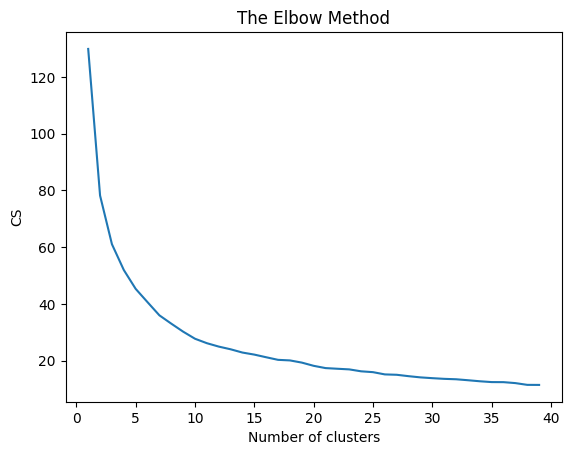

In [536]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

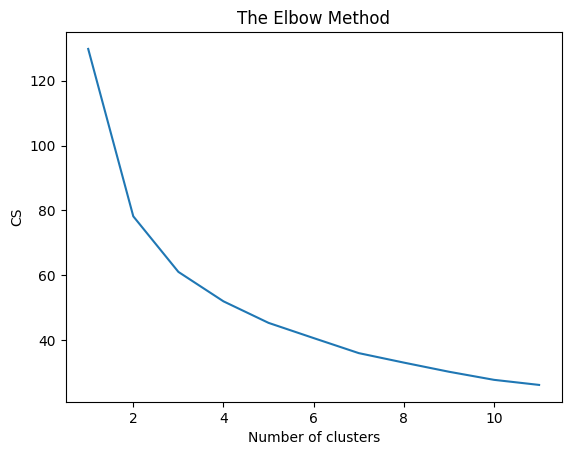

In [537]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [538]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [539]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('sm_aut_l.csv')
print(labels)

[3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 1 3 3 3 3 3 3
 1 1 3 1 3 3 3 1 3 3 1 1 1 3 3 3 3 3 1 3 3 3 1 1 3 1 1 1 3 3 3 3 3 1 1 3 1
 3 1 1 1 1 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 1 1 1 1 1 3 3 1
 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 1 1 1 1 1 1 0 0 0 0 0 0 3 3 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 3 3 3 3 3 3 3 3 0 3 0 3 3 0 0 3 3 0 0 0 0 0
 0 0 0 0 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0
 0 0 0 0 0 2 0 2 0 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 0 1 0 0 3 3 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 3 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 3 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 2 2 2 1 1 1 1 0 0 2 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 0 2 1 1 2
 2 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 1 2 2 2 2 1 

In [540]:
Z=kmeans.cluster_centers_
Z

array([[4.13277078e-01, 2.50216450e-01, 2.45310245e-01, 4.92711929e-01,
        4.92467532e-01],
       [2.07183845e-01, 9.40016103e-02, 9.22136971e-02, 2.81324528e-01,
        4.45990338e-01],
       [6.13132168e-01, 5.35699588e-01, 4.37636166e-01, 6.80965776e-01,
        5.43333333e-01],
       [2.42808799e-01, 1.33986928e-01, 1.41580161e-01, 2.99950360e-01,
        8.32667268e-16]])

In [541]:
import matplotlib

In [542]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.001s...
[t-SNE] Computed neighbors for 717 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.147984
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.389767
[t-SNE] KL divergence after 1750 iterations: 0.298988


In [543]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

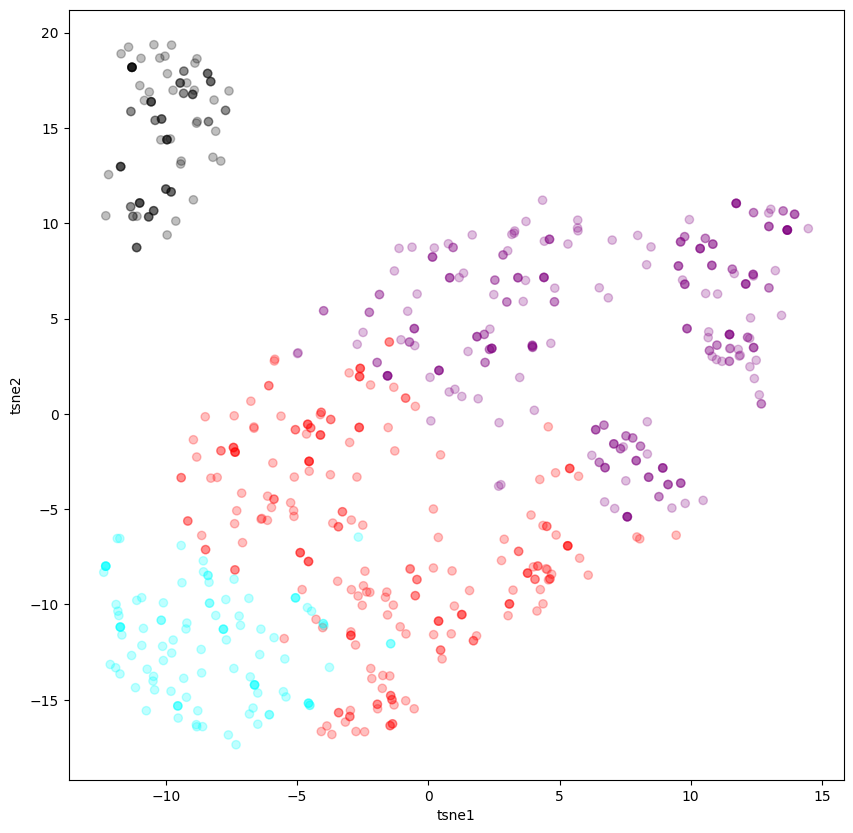

In [544]:
colors = ["red","green","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [545]:
Z3 = ms.inverse_transform(Z)
pd.DataFrame(Z3).to_csv('cc_sm_aut.csv')
Z3

array([[1.49415584e+02, 4.95194805e+01, 5.20216450e+01, 1.32848485e+02,
        3.69350649e+01],
       [1.08815217e+02, 3.54601449e+01, 3.64057971e+01, 9.94492754e+01,
        3.34492754e+01],
       [1.88787037e+02, 7.52129630e+01, 7.16388889e+01, 1.62592593e+02,
        4.07500000e+01],
       [1.15833333e+02, 3.90588235e+01, 4.14411765e+01, 1.02392157e+02,
        6.24500451e-14]])

In [546]:
P = pd.read_csv("tr.csv")
P3=P[["Knowledge","Problem Solving","Interaction","Impact"]]
P3.dropna(inplace=True)
P3 = ms.fit_transform(P3)
P2=kmeans.predict(P3)
P2

ValueError: ignored